#### Implementing Lasso Regression from Scratch in python

###### The information are taken from the Salary_Data.csv 

In [11]:
#Imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# StandardScaler is used to standardize the characteristics after the dataset is read from csv

class LassonReg():

    def __init__(self, learning_rate, iterations, l1_penalty):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penalty = l1_penalty

    # Function for training
    def fit(self, X, Y):
        # No. training_examples, no. of features
        self.m, self.n = X.shape
        #weight initialization
        self.theta = np.zeros(self.n)
        self.intercept = 0
        self.X = X
        self.Y = Y

        #Gradient descent learning 
        for _ in range(self.iterations):
            self.update_theta()
        
        return self
    
    def update_theta(self):
        y_pred = self.predict(self.X)

        #compute the gradient
        #dtheta = derivative of theta 
        dtheta = np.zeros(self.n)
        for j in range(self.n):
            if self.theta[j] > 0:
                dtheta[j] = (-2 * (self.X[:, j]).dot(self.Y - y_pred) + self.l1_penalty) / self.m
            else:
                dtheta[j] = (-2 * (self.X[:, j].dot(self.Y - y_pred)) - self.l1_penalty) / self.m
        
        dintercept = -2 * np.sum(self.Y - y_pred) / self.m 
        
        #update the weights
        self.theta = self.theta - self.learning_rate * dtheta
        self.intercept = self.intercept - self.learning_rate * dintercept
        return self

    def predict(self, X):
        return self.intercept + X.dot(self.theta)

Predicted values: [ 40852.72 123048.99  65137.98]
Real values: [ 37731. 122391.  57081.]
Training theta: 26061.72
Training intercept: 76471.1


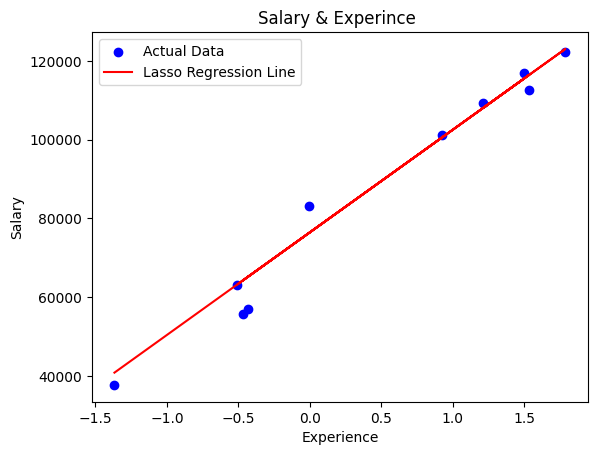

In [13]:
#Main function for calling the self-made model
def main():

    df = pd.read_csv('../database/Salary_Data.csv')
    X = df.iloc[:, :-1].values
    Y = df.iloc[:, 1].values

    #Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    #splitting the data into training and testing
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=.33, random_state=0)

    #Model training 
    model = LassonReg(iterations=1000, learning_rate=.01, l1_penalty=500)
    model.fit(Xtrain, Ytrain)

    #Prediction
    y_pred = model.predict(Xtest)

    print(f"Predicted values: {np.round(y_pred[:3], 2)}")
    print(f"Real values: {Ytest[:3]}")
    #We have only one theta 
    print(f"Training theta: {round(model.theta[0], 2)}")
    print(f"Training intercept: {round(model.intercept, 2)}")

    #Visualization on test set
    plt.scatter(Xtest, Ytest, color="blue", label="Actual Data")
    plt.plot(Xtest, y_pred, color="red", label="Lasso Regression Line")
    plt.title('Salary & Experince ')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()

main()